<h1>Содержание:<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Определение-потенциально-прибыльной-платформы" data-toc-modified-id="Определение-потенциально-прибыльной-платформы-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Определение потенциально прибыльной платформы</a></span></li><li><span><a href="#Объёмы-продаж" data-toc-modified-id="Объёмы-продаж-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Объёмы продаж</a></span></li><li><span><a href="#Влияние-отзывов-на-продажи" data-toc-modified-id="Влияние-отзывов-на-продажи-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Влияние отзывов на продажи</a></span></li><li><span><a href="#Актуальность-жанров" data-toc-modified-id="Актуальность-жанров-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Актуальность жанров</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Портрет-пользователя-каждого-региона" data-toc-modified-id="Портрет-пользователя-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Портрет пользователя каждого региона</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Исследование закономерностей определяющие успешность игры

***Цель проекта:***

Выявить определяющие успешность игры закономерности и для планирования рекламной кампании.

***Ход выполнения проекта:***

В проекте рассматриваются исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Данные, полученные из открытых источников. Нужно выявить определяющие успешность игры закономерности для определения потенциально популярного продукта и спланировать рекламные кампании. Всё начинается с обзора и, если нужно, предобработки данных. Как правило на этапе предобработки основное внимание уделяется заполнению пропусков. Дальше начинают исследовательский анализ данных. Определяются актуальные платформы, целевые жанры и влияние рейтингов. Дальше нужно составить портрет пользователя по регионам основываясь на уже имеющихся выводах по общим данным. В завершении провидится статистический анализ для проверки гипотез и делается финальный вывод, даются рекомендации для проведения рекламной кампании.

## Обзор данных

In [1]:
# Здесь будем импортировать библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [1]:
try:
    df = pd.read_csv('games.csv')
except Exception:
    df = pd.read_csv('/datasets/games.csv')
df

NameError: name 'pd' is not defined

***Описание данных***
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


Давайте подробно разбираться с тем что у нас есть. Первое что бросается в глаза - заглавные буквы в названии колонок. Мы работаем с питоном, а потому приверженцы snake_case. Так же видим пропуски значений в колонках. Посмотрим сколько их:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.isna().sum()/len(df)*100

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

5 из 10 столбцов с пропусками. Сразу смотрим типы данных и обращаем внимание что дата релиза сохранена как чисто с плавающей точкой. Оценка пользователей, согласно описанию, численное значение (в идеале целочисленное) в таблице как текстовое. Позже посмотрим список уникальных значений и найдём причины. Сейчас смотрим на разброс данных.

In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


В столбцах с продажами по странам сильное отклонение среднего от медианы, что также видно по стандартному отклонению. Сильно выделяющиеся максимальные значения.

### Вывод

В результате обзора данных поставим следующие задачи для предобработки:
1. Замените названия столбцов;
2. Обработать пропуски;
3. Преобразовать данные в нужные типы.

## Предобработка данных

Рассмотрев данные мы выявили ряд недочётов. Обработаем данные по намеченным пунктам. Начнём с приведения имен столбцов к нижнему регистру.

In [6]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
df.columns = df.columns.str.lower()

In [8]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Ислледуем таблицу на наличие явных дубликатов.

In [9]:
df.duplicated().sum()

0

Перед изменением типов данных обработаем пропуски. Пойдём по колонкам по порядку.

In [10]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Две игры 1993 года без названия, эти данные нам не восстановить. Удаляем.

In [11]:
df = df.dropna(subset=['name']).reset_index(drop=True)

In [12]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В части названий игр указана дата. Как правило даты в названии совпадают с датой релиза игр. А если не совпадают, то являются наиболее близкими значениями (за исключением таких игр как 'battlefield 1942'). Заполним часть пропусков датой из названия. Чтобы защититься от выбросов полученные даты возьмём только в диапазоне с 1980-2016 (min, max из столбца).

In [13]:
def get_date(row):
    min_year = df['year_of_release'].min()
    max_year = df['year_of_release'].max()
    
    if pd.isnull(row['year_of_release']):
        if row['name'].split()[-1].isdigit() and min_year <= int(row['name'].split()[-1]) <= max_year:
            return pd.to_numeric(row['name'].split()[-1])
    else:
        return row['year_of_release']

In [14]:
df['year_of_release'] = df.apply(get_date, axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16459 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [16]:
16459 - 16446

13

Не особо глобальными получились изменения. Но мы на этом не остановимся! Новая платформа поступает в продажу вытесняя старую, на определённый период, пока её не вытеснит более новая. То есть время "жизни" платформы ограниченно каким-то периодом. Пока новая платформа набирает популярность, к ней выходят игры. Мы можем сгруппировать данные по платформам, найти среднее значение года для этого периода и заполнить им оставшиеся пропуски. Не самый точный вариант, зато вполне рабочий. Сначала убедимся что в столбце "platform" всё в порядке.

In [17]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Всё в порядке. Группируем данные, ищем среднее, заполняем пропуски.

In [18]:
df['year_of_release'] = df['year_of_release'].fillna(df.groupby('platform')['year_of_release'].transform('mean'))


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Уже лучше. Но это всё были весьма второстепенные данные. Для нас ключевыми являются рейтинги. В `critic_score` пропущено около половины значений, чуть меньше в `user_score`. Заполнить эти пробелы по имеющимся данным не представляется возможным. Отбросив половину данных потеряем слишком много информации. Оставим пропуски в этих столбцах без изменений.

Во время обзора данных мы увидели что 'user_score' имеет тип object. Найдём причину.

In [20]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Некоторые игры имеют оценку от пользователей - 'tbd'. Давайте посмотрим сколько игр имеют такую оценку.

In [21]:
df[df['user_score'] == 'tbd']['user_score'].count()

2424

Согласно источникам tbd - To Be Decided (будет решено). То есть так отмечены игры ещё не получившие оценку пользователей. Для нас это не что иное как NaN. Получается что пропусков в 'user_score' на 2000 больше. Столбец скорее пуст. Перепишем 'tbd' на NaN.

In [22]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

Остаётся последний столбец: рейтинг от организации ESRB. В столбце большое количество пропускв, это связано с тем что наша база данных охватывает 36 лет игровой индустрии начиная с 1980. ESRB была основана в 1994 году. Логично что игры, до момента основания ESRB, рейтинг не получали. С другой стороны индустрия была не развита и игр было очень небольшое количество. Давайте проверим.

In [23]:
df.query('year_of_release < 1994').count()

name               382
platform           382
year_of_release    382
genre              382
na_sales           382
eu_sales           382
jp_sales           382
other_sales        382
critic_score         3
user_score           3
rating               4
dtype: int64

Пропусков оказалось относительно немного. Мы можем попробовать заполнить пропуски с группировкой по жанрам. Что бы не делать это вслепую, сначала возьмём жанр и посмотри какие чаще ему присваивают рейтинги. Давайте начнём, печатаем список.

In [24]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [25]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

<AxesSubplot:title={'center':'Number of games in genre "Action"'}, xlabel='Rating', ylabel='Number of games'>

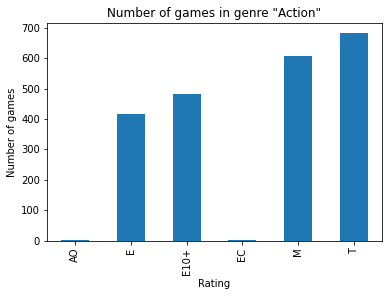

In [26]:
df.query('genre == "Action"').groupby(by='rating')['name'].count().plot(
    kind='bar',
    title='Number of games in genre "Action"',
    ylabel='Number of games',
    xlabel='Rating'
)

<AxesSubplot:title={'center':'Number of games in genre "Shooter"'}, xlabel='Rating', ylabel='Number of games'>

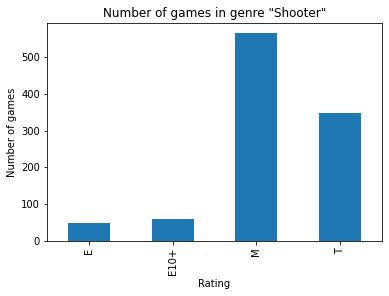

In [27]:
df.query('genre == "Shooter"').groupby(by='rating')['name'].count().plot(
    kind='bar',
    title='Number of games in genre "Shooter"',
    ylabel='Number of games',
    xlabel='Rating'
)

<AxesSubplot:title={'center':'Number of games in genre "Sports"'}, xlabel='Rating', ylabel='Number of games'>

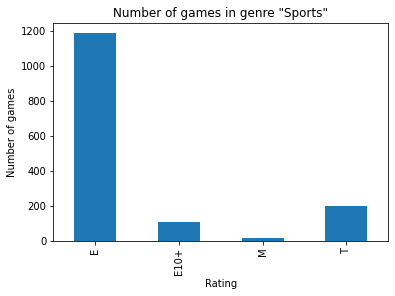

In [28]:
df.query('genre == "Sports"').groupby(by='rating')['name'].count().plot(
    kind='bar',
    title='Number of games in genre "Sports"',
    ylabel='Number of games',
    xlabel='Rating'
)

Как видим, распределение для одних жанров неравномерно для нескольких рейтингов, для других более ссылается к одному. Мы можем заполнить определённые жанры, к примеру для "sports" это в большинстве случаев "E". Но тогда получим смещение этого жанра для других, что приведёт к искажению результатов. Заменим пропуски значением "заглушкой". Это позволит учесть их при дальнейшем анализе.

In [29]:
df['rating'].fillna('Unknown', inplace=True)

После того как пропуски заполнены (насколько это возможно), можно переходить к изменению типов данных. Начнём со столбца с годом релиза. Столбец содержит только год, приводить его к DateTime не нужно.

In [30]:
df['year_of_release'] = df['year_of_release'].astype('int32')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           16713 non-null  object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.3+ MB


После того как мы избавились от текстовых значений в 'user_score' можно привести столбец к типу float.

In [32]:
df['user_score'] = df['user_score'].astype('float32')

На этом предобработку можно считать завершённой. В завершении посчитаем сумму продаж во всех странах и сведём полученные данные в отдельный столбец "total_costs".

In [33]:
df.insert(8, 'total_sales', df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis=1))

In [34]:
df['rating'].unique()

array(['E', 'Unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [35]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,Unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,NaN,NaN,Unknown
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.01,NaN,NaN,Unknown
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,Unknown
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.01,NaN,NaN,Unknown


### Вывод

Подводя итог по предобработке данных можно сказать что часть данных удалось восполнить по уже имеющимся. Некоторые данные остались с пропусками, т.к. проект учебный и запросить более полную выгрузку возможности нет, а заполнение данных приведёт к их искажению, было принято решение оставить их без изменения.

## Исследовательский анализ данных

Когда данные прошли предобработку самое время приступать к исследованиям. Исходя из цели проекта нам нужно определить:

* Сколько игр выпускалось в разные годы;
* Какие периоды наиболее актуальны для прогнозирования;
* Как изменялись продажи по платформам;
* Определить наиболее популярные платформы;
* Срок актуальности платформы;
* Определить актуальный период;
* Определить лидирующие по продажам платформы;
* Построить график `boxplot()` по глобальной продаже игр в разбивке по платформам;
* Оценить как влияют отзывы пользователей и критиков на продажи внутри популярной платформы;
* Посчитать корреляцию между отзывами и продажами;
* Соотнести выводы с продажами игр на других платформах;
* Проанализировать распределение игр по жанрам;
* Определить наиболее прибыльные жанры.

### Определение потенциально прибыльной платформы

Цели сформированы, начнём с постройки сводной таблицы в которой отразим сколько игр и на какую платформу было выпущено.

In [36]:
release_of_year = df.pivot_table(
    index='year_of_release', columns='platform', values='name', aggfunc='count', fill_value=0
)

In [37]:
release_of_year

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1981,46,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1982,53,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1983,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1984,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1985,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1986,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1987,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1988,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Построим график по суммарным продажам по годам.

<AxesSubplot:title={'center':'Releases per year'}, xlabel='Year', ylabel='Releases'>

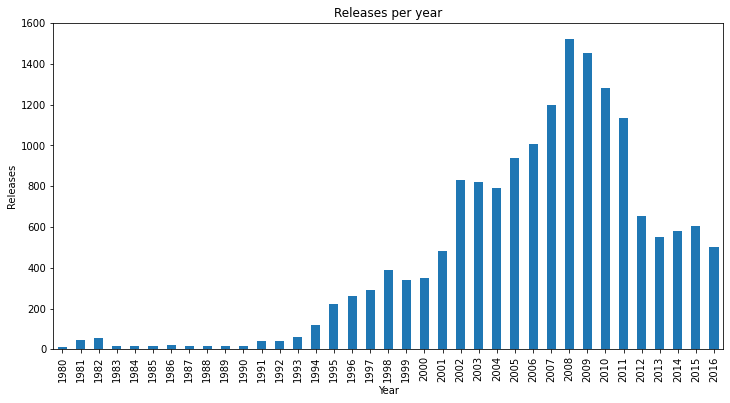

In [38]:
release_of_year.sum(axis=1).plot(
    kind='bar', 
    title='Releases per year', 
    ylabel='Releases', 
    xlabel='Year', 
    figsize=(12, 6)
)

На графике видно как развивалась игровая индустрия. В первые десять лет мы видим что развития практически не было, выпускалось по 20-30 игр в год. Затем, в 1993 начался подъём и уже через пять лет количество игр увеличилось в 4 раза и к 2000 году составлял 400 игр в год. За следующие 5 лет количество выпускаемых игр увеличилось в двое и в среднем составляло 800 релизов в год к 2005 году. Пик развития приходится на 2008 год, когда на рынок вышло 1524 игры. После чего в индустрии наблюдается спад и уже в 2012 году количество релизов опускается до 600 в год, ниже уровня 2005 года. Скорее всего дальше на графике будет период стагнации.

Отбросим данные до 1994 года поскольку данный период уже не актуален. Так же очистим таблицу от платформ популярных в ранние года и ныне не актуальны.

In [39]:
release_of_year = release_of_year.query('year_of_release >= 1994').drop(
    ['2600', 'GG', 'SCD', 'WS', 'TG16', '3DO', 'GEN', 'NES', 'GB', 'PCFX', 'DC', 'NG'], 
    axis=1
)
release_of_year

platform,3DS,DS,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,SAT,SNES,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,
1994,0,0,0,0,0,6,17,0,0,0,0,0,19,53,0,0,0,0,0
1995,0,0,0,0,0,2,99,0,0,0,0,0,52,54,0,0,0,0,0
1996,0,0,0,0,18,4,164,0,0,0,0,0,38,30,0,0,0,0,0
1997,0,0,0,0,49,6,188,0,0,0,0,0,34,4,0,0,0,0,0
1998,0,0,0,0,80,8,255,0,0,0,0,0,29,2,0,0,0,0,0
1999,0,0,0,0,102,7,200,0,0,0,0,0,1,1,0,0,0,0,0
2000,0,0,1,0,60,7,160,82,0,0,0,0,0,0,0,0,0,1,0
2001,0,0,107,22,9,15,91,185,0,0,0,0,0,0,0,0,0,33,0
2002,0,0,198,152,1,19,20,280,0,0,0,0,0,0,0,0,0,159,0


Уже по таблице отчётливо видно как начинали и заканчивали развиваться платформы. Визуализируем серию 'PS'.

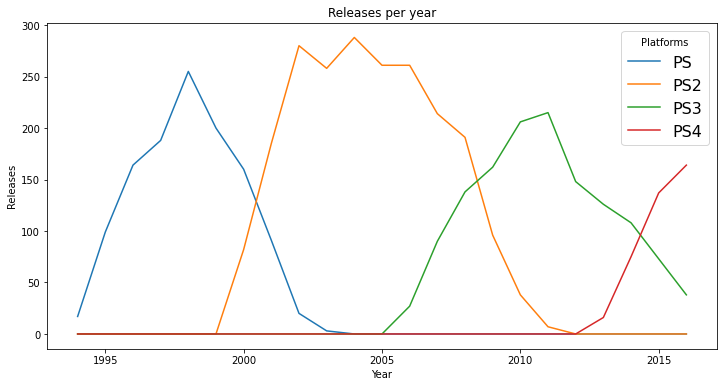

In [40]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(release_of_year['PS'], label = 'PS')
ax.plot(release_of_year['PS2'], label = 'PS2')
ax.plot(release_of_year['PS3'], label = 'PS3')
ax.plot(release_of_year['PS4'], label = 'PS4')
ax.legend(fontsize = 16, title = 'Platforms')
ax.set(xlabel='Year', ylabel='Releases',
       title='Releases per year')
plt.show()

На графике отчётливо видно что период подъёма в среднем занимает 5 лет. После чего достигает максимума и тем же темпом идёт на спад. За исключением 'PS2' у которой так же присутствует задержка на пике популярности. В среднем платформа держится на рынке 10 лет. Примерно на пике популярности выходит новая платформа, тем самым перекрывая спрос не давая упасть продажам. Можно увидеть что 'PS4' только набирает популярность в следующем году выйдет на максисум. Для сравнения посмотрим конкурирующую платформу 'XB'.

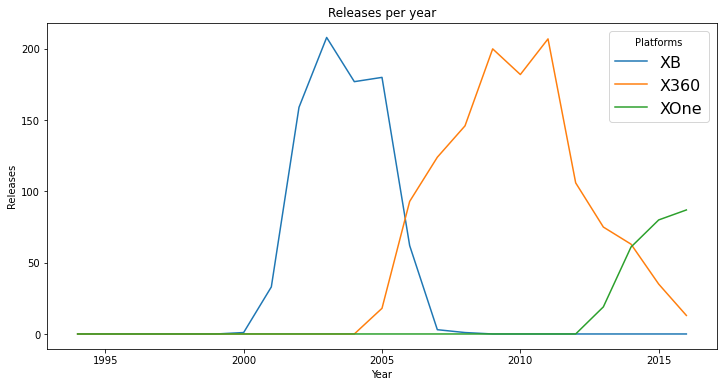

In [41]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(release_of_year['XB'], label = 'XB')
ax.plot(release_of_year['X360'], label = 'X360')
ax.plot(release_of_year['XOne'], label = 'XOne')
ax.legend(fontsize = 16, title = 'Platforms')
ax.set(xlabel='Year', ylabel='Releases',
       title='Releases per year')
ax.ylabel='Releases'
plt.show()

Видим аналогичную ситуацию. Первая версия платформы 'XB' резко набрала популярность и так же быстро её потеряла. Её подхватила 'X360' и продержалась в двое дольше. Последняя 'XOne' как и 'PS4' только начинает подъём.

Рассмотри как выходят игры для PC.

<AxesSubplot:title={'center':'Releases per year'}, xlabel='Year', ylabel='Releases'>

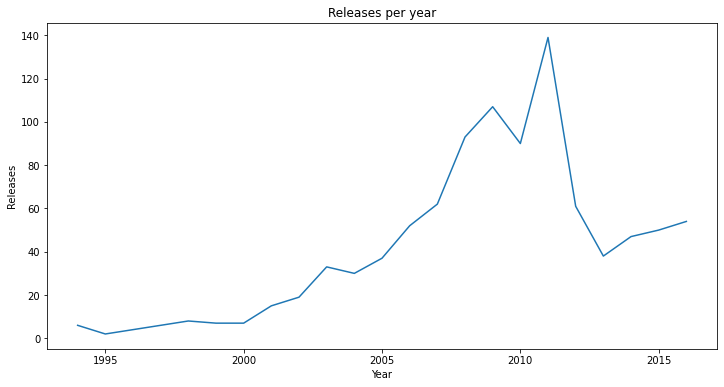

In [42]:
release_of_year['PC'].plot(
    title='Releases per year', 
    ylabel='Releases', 
    xlabel='Year', 
    figsize=(12, 6)
)

На пике популярности игр для PC значительно меньше чем для других платформ. К тому же график не отличается стабильностью имея долгое развитие и резкий спад.

Посмотрим кто лидирует по продажам.

<AxesSubplot:title={'center':'Releases per platform'}, xlabel='Platform', ylabel='Releases'>

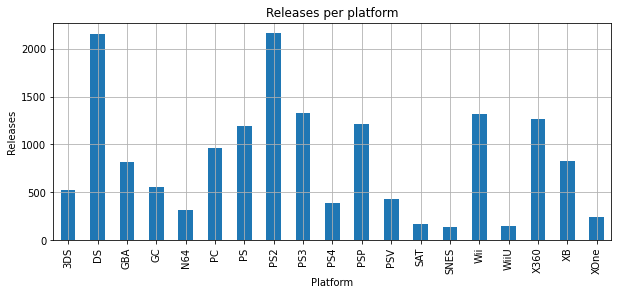

In [43]:
release_of_year.sum(axis=0).plot(
    kind='bar', 
    title='Releases per platform', 
    ylabel='Releases', 
    xlabel='Platform', 
    figsize=(10, 4), 
    grid=True
)


Больше всего игр было продано для 'PS2' и 'DS'. Обе платформы уже вышли из популярности, но мы можем сделал вывод об объёме игр вышедших для них. В среднем для платформ выходит 1300 игр. 

Проанализировав данные, мы можем сделать вывод что актуальной является платформа не старше 5 лет. В среднем, через это время платформа начинает устаревать, а на её смену приходит новая. Дальше для наглядности рассмотрим период с 2006 года.

Подводя итог определим список платформ, которые являются актуальными для нашего исследования:

In [44]:
release_of_year.query('year_of_release > (year_of_release.max() - 10)')

platform,3DS,DS,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,SAT,SNES,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,
2007,0,376,6,4,0,62,0,214,90,0,133,0,0,0,185,0,124,3,0
2008,0,522,0,0,0,93,0,191,138,0,116,0,0,0,316,0,146,1,0
2009,0,403,0,0,0,107,0,96,162,0,161,0,0,0,325,0,200,0,0
2010,0,323,0,0,0,90,0,38,206,0,188,0,0,0,253,0,182,0,0
2011,116,153,0,0,0,139,0,7,215,0,139,18,0,0,143,0,207,0,0
2012,93,23,0,0,0,61,0,0,148,0,106,53,0,0,31,32,106,0,0
2013,99,8,0,0,0,38,0,0,126,16,54,63,0,0,12,42,75,0,19
2014,80,0,0,0,0,47,0,0,108,75,10,101,0,0,6,31,63,0,61
2015,86,0,0,0,0,50,0,0,73,137,3,110,0,0,4,28,35,0,80


Основываясь на последней таблице снова уберём из датасета потерявшие актуальность платформы.

<AxesSubplot:title={'center':'Releases per platform'}, xlabel='Year', ylabel='Releases'>

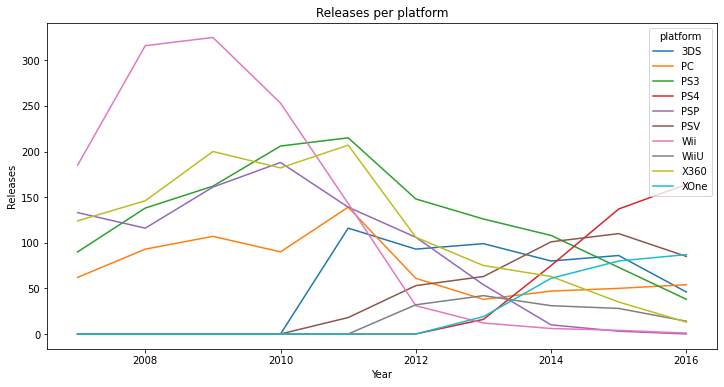

In [45]:
release_of_year.query('year_of_release > (year_of_release.max() - 10)').drop(
    ['DS', 'GBA', 'GC', 'N64', 'PS', 'PS2', 'SAT', 'SNES', 'XB'], axis=1
).plot(
    figsize=(12, 6),
    title='Releases per platform',
    ylabel='Releases',
    xlabel='Year'
)

На графике видно что большинство платформ потеряло свою актуальность. Подводя промежуточный итог делаем вывод что перспективнее всего готовить рекламную кампанию для 'PS4' или 'XOne', потому что они ещё не вышли на пик популярности. Так же актуальными остаются игры для 'PC'. Отберём список для дальнейшего анализа на основании определённых критериев.

In [46]:
actual = df.query(
    'year_of_release > (year_of_release.max() - 5) and platform == ["PS4", "XOne", "PC"]'
).reset_index(drop=True)

### Объёмы продаж

Определившись с целевыми платформами, переходим к исследованию объёмов продаж игр в мире.

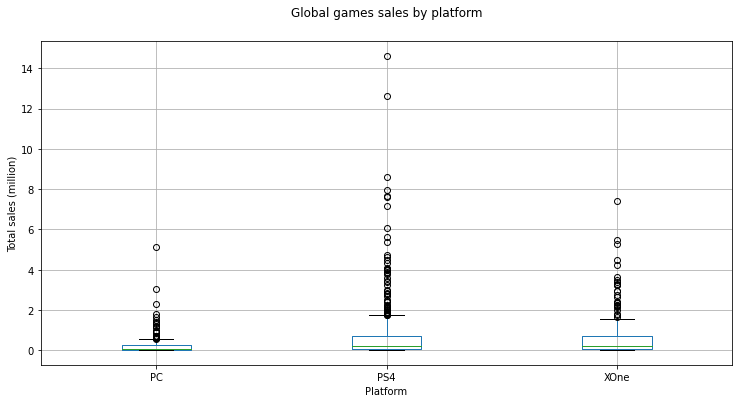

In [47]:
actual.boxplot('total_sales', by='platform', figsize=(12,6))
plt.suptitle('Global games sales by platform')
plt.title(None)
plt.xlabel('Platform')
plt.ylabel('Total sales (million)')
plt.show()

По диаграмме размаха видим что наблюдаемый максимум не превышает двух миллионов. Данные выше него определены как выбросы. Для 'PS4' есть два значения превышающие продажи в 12 и 14 миллионов. Даже стало интересно что это за игры. Давайте найдём их, а после рассмотрим диаграммы размаха более детально.

In [48]:
actual[actual['total_sales'] > 12]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,NaN,NaN,Unknown
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,12.62,97.0,8.3,M


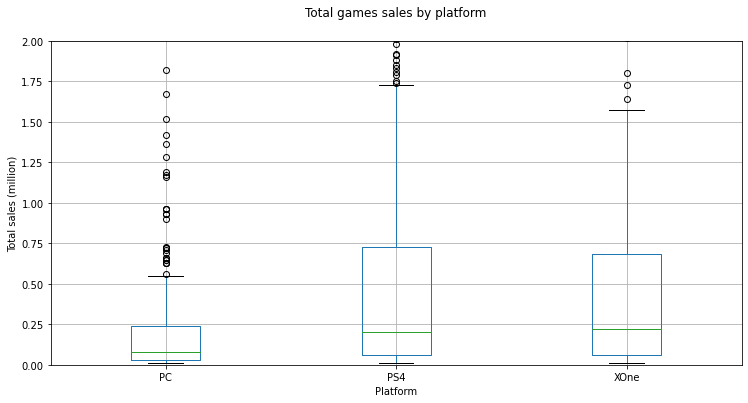

In [49]:
actual.boxplot('total_sales', by='platform', figsize=(12,6))
plt.suptitle('Total games sales by platform')
plt.title(None)
plt.xlabel('Platform')
plt.ylabel('Total sales (million)')
plt.ylim(0, 2)
plt.show()

In [50]:
actual.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PC,250.0,0.250600,0.494640,0.01,0.03,0.08,0.240,5.14
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.730,14.63
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.685,7.39


Продажи для всех платформ начинаются с 0,1. Для 'PC' чуть выше начинается нижний квартиль. Интерквантильный размах составляет всего 0.16. Верхний квартиль не дотягивает до медианы других платформ. Низкое стандартное отклонение говорит о небольшом разбросе данных выборки. Это говорит о том, что значения выборки близки к среднему. При том что значение для 'PC' почти в два раза больше, чем для 'PS4'. Для второй стандартное отклонение выше в 3 раза что может говорить о худшем качестве данных. Для двух других платформ значения очень близки, это два ярких конкурента делящих рынок игровой индустрии. Для 'XOne' значений меньше, что говорит о сравнительно меньшей популярности платформы, что, собственно, мы и видели на графиках, когда определяли актуальные платформы.

Датасет для всех трёх графиков датасет скошен вправо. Это видно как по диаграмме размаха - медиана тяготеет к первому квартилю, так и по отношению медианы к среднему - медиана меньше среднего. Как уже описывалось выше, медианные заказы у 'PS4' и 'XOne' больше и шире. Это говорит о больших продажах относительно 'PC'.

### Влияние отзывов на продажи

Перейдём к исследовании отзывов критиков и пользователей. Смысла анализировать все платформы нет, так как на разных этапах развития индустрии ситуация могла меняться. Исследование будем проводить для ранее определённых платформ. Начнём с 'PC' и после применим алгоритм к двум другим. Так как решение будет типовым запишем весь алгоритм в функцию и позже проведём исследование для других платформ.

In [51]:
def scatter_plot(res_platform):      
    actual[actual['platform'] == res_platform].plot(
        x = 'critic_score', 
        y = 'total_sales', 
        kind='scatter', 
        title=f'Dependence of sales on critic ratings for {res_platform}',
        ylabel='Total sales (million)',
        xlabel='Critic score',
        figsize=(8,4),
        alpha=0.4
    )
    print('Сorrelation of critic to sales:',
          round(
              actual[actual['platform'] == res_platform]['total_sales']
              .corr(actual[actual['platform'] == res_platform]['critic_score']), 3))
    
    actual[actual['platform'] == res_platform].plot(
        x = 'user_score', 
        y = 'total_sales', 
        kind='scatter', 
        title=f'Dependence of sales on user ratings for {res_platform}',
        ylabel='Total sales (million)',
        xlabel='User score',
        figsize=(8,4),
        alpha=0.4
    )
    
    print('Сorrelation of critic to sales:',
          round(
              actual[actual['platform'] == res_platform]['total_sales']
              .corr(actual[actual['platform'] == res_platform]['user_score']), 3))

Функция построена и готова принимать на вход только одно значение, исследуемую платформу.

Сorrelation of critic to sales: 0.237
Сorrelation of critic to sales: -0.122


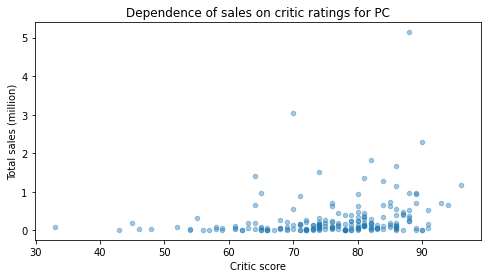

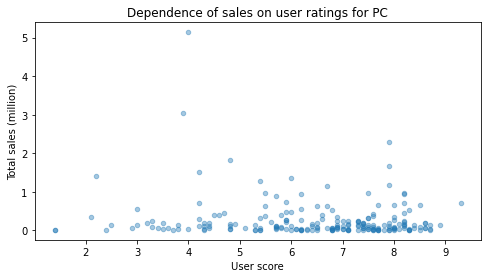

In [52]:
scatter_plot('PC')

Смотря на графики можно сказать что если зависимость есть, то очень незначительная. Все значения что для пользователей, что для критиков сконцентрированы в нижнем диапазоне. Это видно и по значениям корреляции, зависимость близка к нулю.

Сorrelation of critic to sales: 0.407
Сorrelation of critic to sales: -0.032


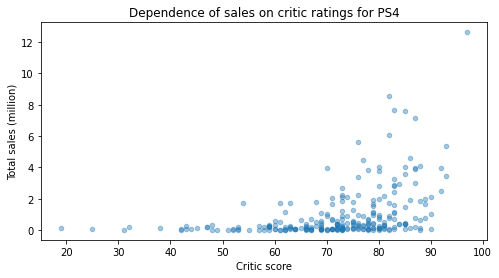

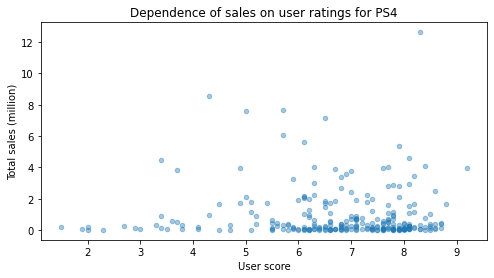

In [53]:
scatter_plot('PS4')

Для 'PS4' зависимость продаж от оценок критиков уже имеет среднюю, положительную связь. Чего не скажешь об оценках пользователей, значение корреляции близка к нулю.

Сorrelation of critic to sales: 0.417
Сorrelation of critic to sales: -0.069


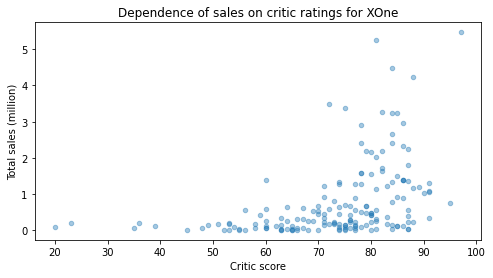

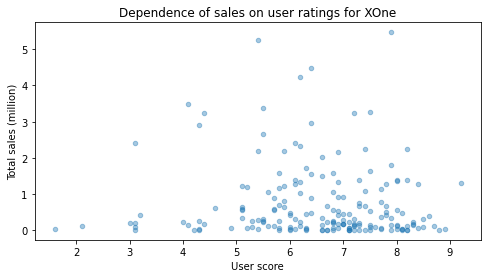

In [54]:
scatter_plot('XOne')

Для 'XOne' ситуация аналогична предыдущей. Средняя положительная зависимость от оценки критиков и низкая от пользователей.

### Актуальность жанров

Теперь рассмотрим есть ли зависимость между продажами и жанрами. Какие жанры более востребованы, а какие просто занимают пустующую нишу.

<AxesSubplot:title={'center':'Releases per ganre'}, xlabel='Genre', ylabel='Releases'>

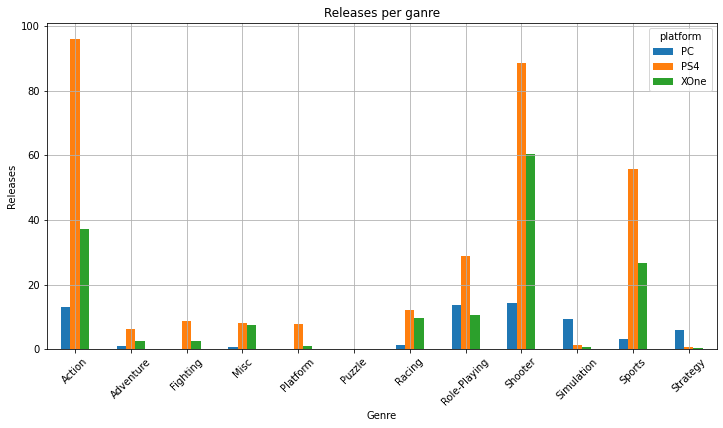

In [55]:
actual.pivot_table(
    index='genre', columns='platform', values='total_sales', aggfunc='sum'
).plot(
    kind='bar',
    title='Releases per ganre',
    ylabel='Releases',
    xlabel='Genre',
    figsize=(12, 6), 
    grid=True,
    rot=45
)

На графике видно что наиболее популярны жанры 'Shooter' и 'Action'. За ними идёт жанр 'Sports'. Во всех трёх первое место занимает 'PS4', за ним идёт 'XOne' и 'PC'. Так же можно отметить жанры 'Role-Playing', 'Simulation' и 'Strategy' где лидирующие позиции занимает 'PC'. Построим диаграммы размаха.

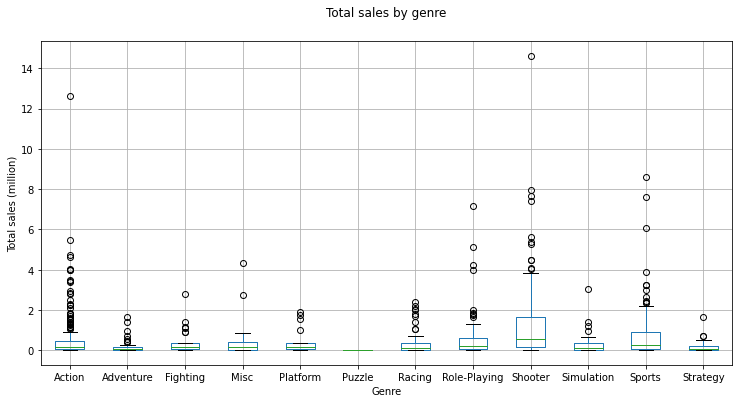

In [56]:
actual.boxplot('total_sales', by='genre', figsize=(12,6))
plt.suptitle('Total sales by genre')
plt.title(None)
plt.xlabel('Genre')
plt.ylabel('Total sales (million)')
plt.show()

На графике отлично видно выбросы, но нас больше интересуют данные до максимального значения диаграмм размаха.

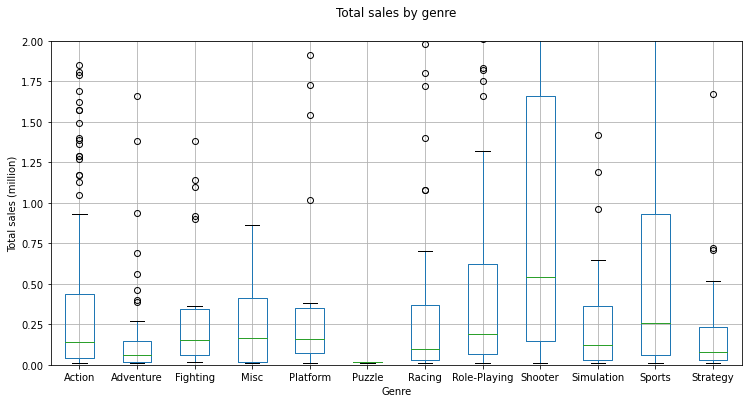

In [57]:
actual.boxplot('total_sales', by='genre', figsize=(12,6))
plt.suptitle('Total sales by genre')
plt.title(None)
plt.xlabel('Genre')
plt.ylabel('Total sales (million)')
plt.ylim(0, 2)
plt.show()

Можно выделить лидеров продаж - жанры 'Shooter' и 'Sports'. На примере жанра 'Shooter' можно сказать что первый квартиль выше - продаж больше, датасет скошен вправо - большенство платит больше медианной суммы.

### Вывод

В данном разделе мы выяснили что платформа набирает популярность в среднем за пять леть после появления на рынке. Через пять лет выходит новая перехватывая внимание пользователя на себя и цикл повторяется. Таким образом срок жизни платформы составляет около 10 лет. После она становится неактуальной и игры для неё больше не выпускаются. Если расcчитывать рекламную компанию, то для платформ, с момента презентации которых прошло не больше 5 лет.

Выделив три основных платформы: PC, PS4, XOne мы выполнили анализ рынка для них. Выяснили что больше всего игр продают для PS4 и XOne. Проанализировав диаграмму размаха выяснили что средний пользователь тратит больше при покупке игр для этих платформ.

Проанализировали как отзывы критиков и пользователей влияют на продажи. Актуальным это оказалось для 'XOne' и 'PS4' только для отзывов критиков. Корреляция для других платформ близка к нулю.

## Портрет пользователя каждого региона

Ранее мы рассматривали общие данные, но в исходных данных даны продажи в трёх регионах: NA, EU, JP. Можно составить портрет среднего пользователя для них чтобы рекламная кампания насколько возможно точно попадала в целевую аудиторию. Начнём с самых популярных платформ. Ограничимся ранее определённым периодом в 5 лет.

In [58]:
def top_five(x, region):
    df.query('year_of_release > (year_of_release.max() - 5)').pivot_table(
        index=x,  
        values=region.lower()+'_sales', 
        aggfunc='sum'
    ).sum(axis=1).sort_values(ascending=False)[:5].plot(
        kind='bar', 
        title=f'Sales per {x} in {region.upper()}', 
        ylabel='Sale', 
        xlabel=x, 
        figsize=(10, 4),
        rot=0
    )

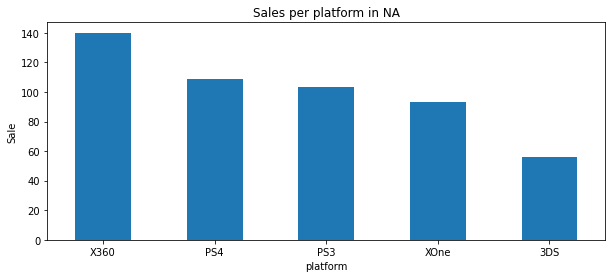

In [59]:
top_five('platform', 'na')

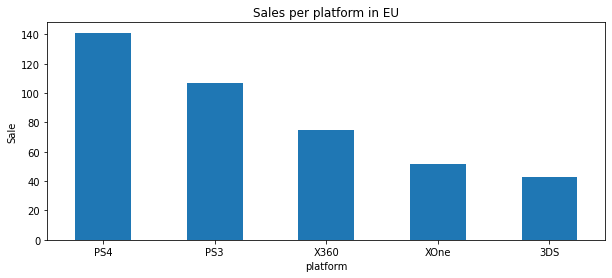

In [60]:
top_five('platform', 'eu')

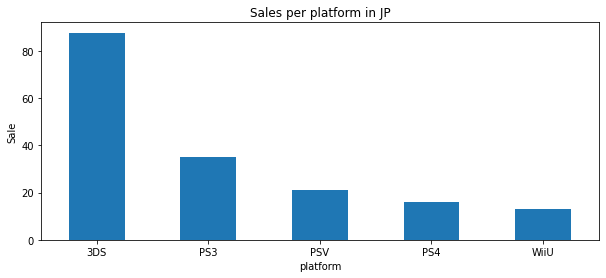

In [61]:
top_five('platform', 'jp')

Взяв выборку по продажам за последние пять лет мы определили какие платформы пользуются наибольшей популярностью в каждом регионе. Результаты показывают что за первое и второе место борются PS3 и X360 почти вдвое опережая другие платформы. Стоит заметить как 'PS4' набирает популярность в регионе 'NA'. Исключением является JP где лидирующее место занимает 3DS более чем в два раза обгоняя 'PS3', а X360 вообще не попала в список.

Теперь определим топ 5 жанров за тот же период. Для построения графиков используем ту же функцию передавая параметр 'genre'.

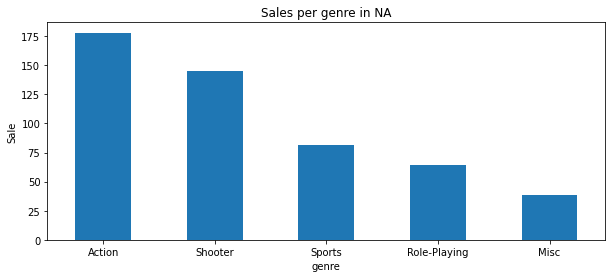

In [62]:
top_five('genre', 'na')

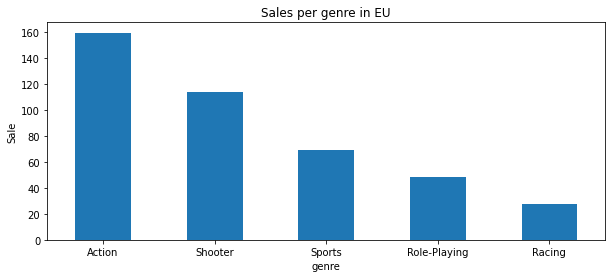

In [63]:
top_five('genre', 'eu')

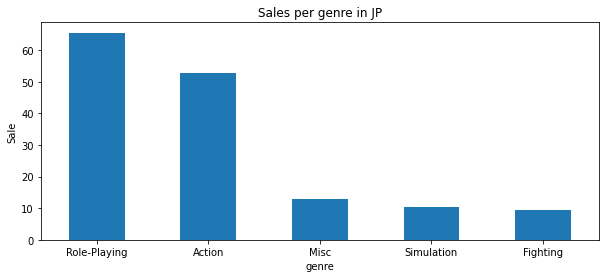

In [64]:
top_five('genre', 'jp')

Для 'NA' и 'EU' результаты совпали, лидерами оказались жанры 'Action', 'Shooter' и 'Sports'. JP опять отличилась, на первом месте оказался жанр 'Role-Playing' опередив 'Shooter' на 1/3.

Проанализируем влияние рейтинга на продажи по регионам. В разделе по предобработке данных мы выяснили что между жанрами 'Action' и 'Shooter' есть зависимость через рейтинг, скорее всего результаты будут похожи.

In [65]:
def rating_infuence(region):
    temp = df.query('year_of_release > (year_of_release.max() - 5)').pivot_table(
        index='rating', columns='platform', values=region.lower()+'_sales', aggfunc='sum'
    )
    df.query('year_of_release > (year_of_release.max() - 5)').pivot_table(
        index='rating', values=region.lower()+'_sales', aggfunc='sum'
    ).sort_values(region.lower()+'_sales', ascending=False).plot(
        kind='bar', 
        title=f'Sales per rating in {region.upper()}', 
        ylabel='Sale', 
        xlabel='Rating', 
        figsize=(10, 4),
        rot=0
    )
    return temp

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
rating,,,,,,,,,,,
E,17.43,0.80,0.21,20.85,16.76,0.13,1.75,2.70,15.39,24.07,14.40
E10+,8.59,0.61,0.90,7.77,9.02,NaN,0.97,13.43,11.80,13.87,9.00
M,1.34,NaN,11.74,50.64,42.81,NaN,3.73,NaN,1.99,74.40,44.92
T,3.76,NaN,5.04,11.97,16.38,0.00,2.70,0.11,2.21,13.97,10.17
Unknown,25.03,3.18,1.23,12.15,23.77,0.00,1.94,1.21,6.71,13.74,14.63


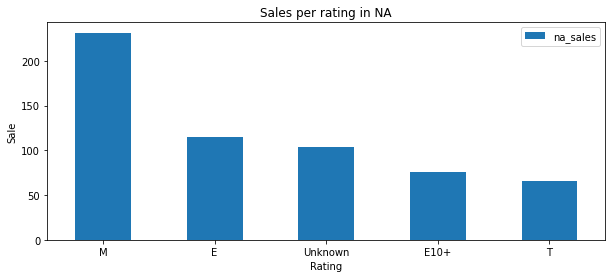

In [66]:
rating_infuence('na')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
rating,,,,,,,,,,,
E,14.66,0.82,4.66,24.75,27.56,0.42,2.44,2.82,10.16,14.30,10.46
E10+,5.71,0.53,2.19,8.04,8.80,NaN,2.06,8.36,8.01,7.83,4.03
M,0.42,NaN,17.29,52.33,58.43,NaN,2.61,NaN,1.49,37.65,23.74
T,1.85,NaN,7.81,9.30,18.31,0.00,1.91,0.05,1.46,7.26,5.06
Unknown,20.21,2.18,5.81,12.44,27.99,0.00,2.39,0.69,4.01,7.48,8.30


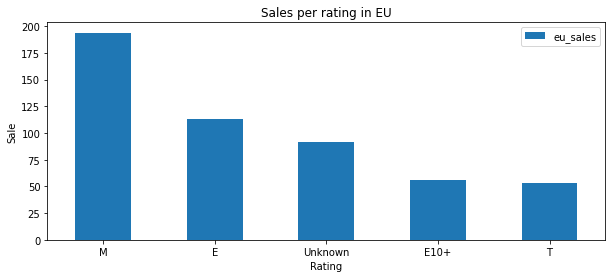

In [67]:
rating_infuence('eu')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
rating,,,,,,,,,,,
E,16.29,0.37,0.0,2.76,0.84,0.34,0.16,0.82,6.66,0.05,0.04
E10+,3.89,0.00,0.0,0.22,0.67,NaN,0.29,0.33,2.75,0.01,0.03
M,1.49,NaN,0.0,10.97,5.23,NaN,1.95,NaN,0.29,1.08,0.19
T,6.12,NaN,0.0,10.11,2.97,0.26,5.85,0.00,0.47,0.28,0.03
Unknown,60.05,3.35,0.0,11.23,6.25,9.87,12.86,2.24,2.84,0.15,0.05


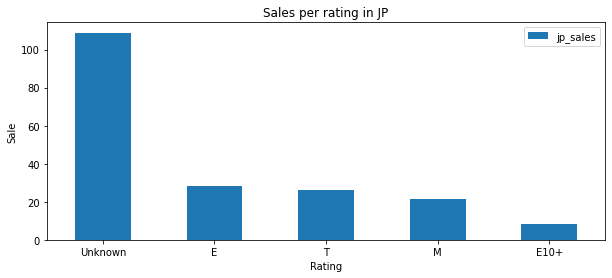

In [68]:
rating_infuence('JP')

Как и ожидалось, ситуация для 'NA' и 'EU' результаты оказались очень похожи на анализ жанров. Так, на первом месте по продажам рейтинг 'M' - возрастное ограничение игры не подходят для подростков младше 17 лет. На втором 'E' - для возрастной категории от 6 лет. На третье место попало наше значение "заглушка" - 'Unknown'. Тоесть по сути игры без рейтинга. Для 'JP' рейтинг 'Unknown' - возглавил список опередив остальные рейтинги на 3/4. Конечно отчасти это связано с тем что под этим значением скрыта часть игр, рейтинг которых просто был пропущен при формировании датасета, но это лишь часть значений. Получается что регион 'JP' лидер по продажам игр без рейтинга.

### Вывод

Подводя итог можно составить следующие портреты пользователей:
* NA - Жанр - 'Action' рейтинга 'M' для платформы серии Xbox;
* EU - Жанр - 'Action' рейтинга 'M' для платформы серии PS;
* JP - Жанр - 'Role-Playing' рейтинга 'E' для платформы 3DS;

## Проверка гипотез

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Для того чтобы проверить гипотезы, их нужно сформировать. Первой проверим гипотезу о том что "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". Эта гипотеза является нулевой. На её основании формируется альтернативная, та что принимается если отвергается нулевая. Альтернативная гипотеза звучит следующим образом: Средние пользовательские рейтинги платформ Xbox One и PC различаются. 

Проверка гипотез осуществляется посредством `.stats.ttest_ind` из библиотеки SciPy. Данным методом можно проверять гипотезы о равенстве средних двух генеральных совокупностей. Для него задаётся параметр `alpha` - уровень статистической значимости, задаётся в процентах. Окончательное решение о его величине всегда остаётся за аналитиком. 5% является общепринятым пороговым значением и достаточно для нашего теста. Так же стоит учесть параметр 'equal_var'. Т.к. метод создан для анализа с выборками одинакового размера для генеральных совокупностей с одинаковыми дисперсиями (а наши выборки по размеру неодинаковы), то этому параметру нужно передать значение False.

In [69]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    df.query('year_of_release > (year_of_release.max() - 5) & platform == "XOne"')['user_score'].dropna(), 
    df.query('year_of_release > (year_of_release.max() - 5) & platform == "PC"')['user_score'].dropna(), 
    equal_var = False
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5489560454239967
Не получилось отвергнуть нулевую гипотезу


Результате теста принимаем нулевую гипотезу о равенстве пользовательских рейтингов для 'PC' и 'XOne'.

Проверим ещё одну гипотезу о том что "Средние пользовательские рейтинги жанров Action и Sports одинаковые." Сформулируем альтернативную: "Средние пользовательские рейтинги жанров Action и Sports разные." и перейдём к тесту.

In [70]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    df.query('year_of_release > (year_of_release.max() - 5) & genre == "Action"')['user_score'].dropna(), 
    df.query('year_of_release > (year_of_release.max() - 5) & genre == "Sports"')['user_score'].dropna(), 
    equal_var = False
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.30516254586104e-20
Отвергаем нулевую гипотезу


Выборки небольшие по размеру и мы можем рассчитать и сравнить их среднее.

In [71]:
df.query('year_of_release > (year_of_release.max() - 5) & genre == "Action"')['user_score'].mean()

6.8244276

In [72]:
df.query('year_of_release > (year_of_release.max() - 5) & genre == "Sports"')['user_score'].mean()

5.4558973

Различие есть, но небольшое, попадает в заданный диапазон статистической значимости. Отвергаем нулевую гипотезу и принимаем альтернативную. Здесь стоит напомнить, что никакие эксперименты не доказывают гипотезу, они только ей не противоречат.

## Вывод

В работе была выполнена обзор и предобработка данных. В частности заполнена часть пропущенных значений. Был проведён исследовательский анал данных в результате которого было выявлено три перспективные платформы 'XOne', 'PS4' и  'PC'. Проанализированы продажи для этих платформ, самыми популярными оказались 'Action' и 'Sports'. Была выяснено что рекомендации критиков способны влиять на продажи для 'XOne' и 'PS4' - покупатели прислушиваются к их мнению. Следующим этапом были проанализированы продажи в трёх регионах и составлен их портрет, их приоритеты. В заключении были сформулированы две гипотезы и проведён их статистический анализ.

В Заключении можно сказать что в следующем 2017 году для регионов 'NA' и 'EU' на пике популярности будут две платформы 'XOne' и 'PS4'. Самыми продаваемыми для них станут игры жанров: 'Action', 'Shooter' и 'Sports' рейтинга 'M' или 'Е'. Для региона 'JP' наиболее перспективной остаётся платформа 3DS и игры в жанре 'Role-Playing' без рейтинга.